In [1]:
from datetime import datetime as dt
import time 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import glob
%matplotlib inline

In [2]:
file_location=input('Please enter file location of file: DA_Case_Study.csv')
search_file='DA_Case_Study.csv'


Please enter file location of file: DA_Case_Study.csv C:\Users\ToM\Dropbox\DA - Identity - Tom Joseph\Task


In [3]:
if glob.glob(str(file_location)+'\\'+search_file):
    
    df=pd.read_csv(str(file_location)+'\DA_Case_Study.csv')
    
else: 
    print('File DA_Case_Study.csv NOT Found. PLEASE ENTER CORRECT FILE LOCATION')

C:\Users\ToM\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (18,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,fullVisitorId,visitId,date,visitNumber,channelGrouping,socialEngagementType,visitStartTime,visits,hits,pageviews,...,operatingSystem,isMobile,deviceCategory,mobileDeviceModel,language,continent,subContinent,country,region,networkDomain
0,3.724243e+18,1516957188,20180126,1,NEW - Organic,Not Socially Engaged,1516957188,1.0,11,5.0,...,Macintosh,False,desktop,NaN,en-us,Asia,Southeast Asia,Indonesia,Bali,telkom.net.id
1,7.048086e+18,1529770055,20180623,2,NEW - Direct,Not Socially Engaged,1529770055,1.0,24,10.0,...,Windows,False,desktop,NaN,de-de,Asia,Southeast Asia,Indonesia,Bali,unknown.unknown
2,5.982596e+18,1505146545,20170911,1,Direct,Not Socially Engaged,1505146545,1.0,13,7.0,...,Windows,False,desktop,NaN,en-us,Asia,Southeast Asia,Indonesia,Bali,unknown.unknown
3,7.196300e+18,1517655094,20180203,10,NEW - Organic,Not Socially Engaged,1517655094,1.0,5,4.0,...,Windows,False,desktop,NaN,en-us,Asia,Western Asia,Qatar,Doha,unknown.unknown
4,9.671780e+17,1513335733,20171215,1,Paid Search,Not Socially Engaged,1513335733,1.0,18,8.0,...,Windows,False,desktop,NaN,en-us,Asia,Western Asia,Qatar,Doha,unknown.unknown


# Task 1-Exploratory Analysis

##### 1) What is the ratio of paying vs non-paying customers ?


In [5]:
df['transactions'].fillna(0,inplace=True)
df['transactions'].value_counts()
df.loc[df['transactions']>0,'Paying_Customer']='Yes'
df.loc[df['transactions']==0,'Paying_Customer']='No'

In [6]:
print('Ratio of Non-paying to paying customers :\n',df['Paying_Customer'].value_counts(normalize=True))


Ratio of Non-paying to paying customers :
 No     0.89103
Yes    0.10897
Name: Paying_Customer, dtype: float64


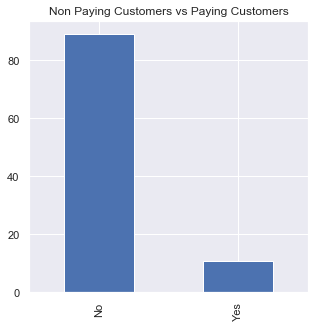

In [7]:
sns.set(rc={'figure.figsize':(5,5)})
(df['Paying_Customer'].value_counts(normalize=True)*100).plot.bar(title='Non Paying Customers vs Paying Customers')
plt.show()

##### 2) The plot of the number of visits per day, split by paying vs non paying users ?

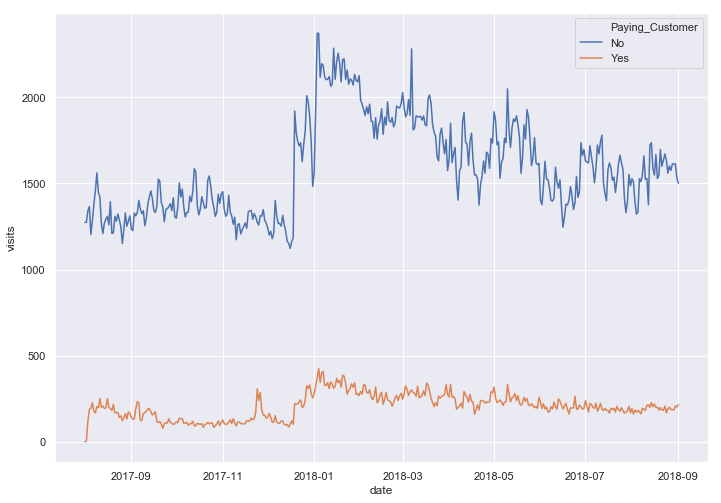

In [8]:
df['date']=df['date'].apply(lambda x :  pd.to_datetime(str(x),format='%Y-%m-%d')) # takes a while 

date_visits=(pd.DataFrame(df.groupby(['date','Paying_Customer'])['visits'].sum()).reset_index())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x='date',y='visits',hue='Paying_Customer',data=date_visits)
plt.show()      

##### 3) Mean revenue distribution by channel grouping and device category


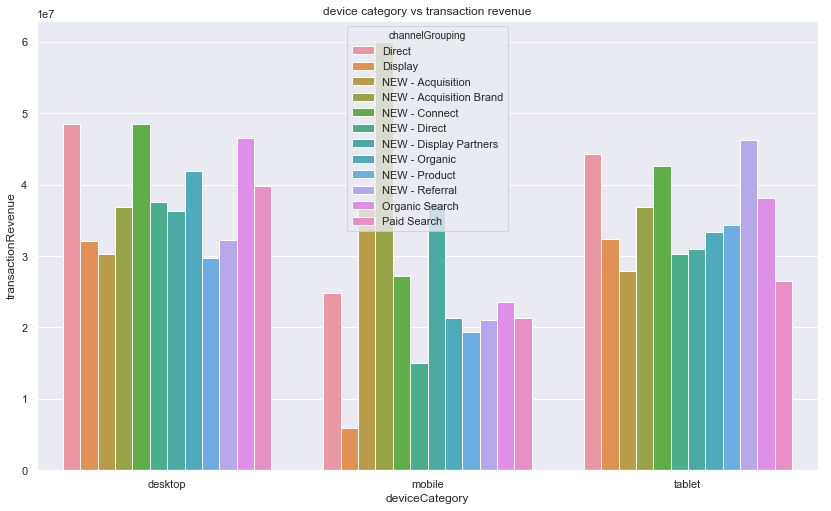

In [9]:
channel_device_revenue=(pd.DataFrame(df.groupby(['channelGrouping','deviceCategory'])['transactionRevenue'].mean()).reset_index())
sns.set(rc={'figure.figsize':(14,8.27)})
sns.barplot(hue='channelGrouping',y='transactionRevenue',x='deviceCategory',data=channel_device_revenue)
plt.title('device category vs transaction revenue')
plt.show()

##### 4) Relation between Paying_Customers and Page Views

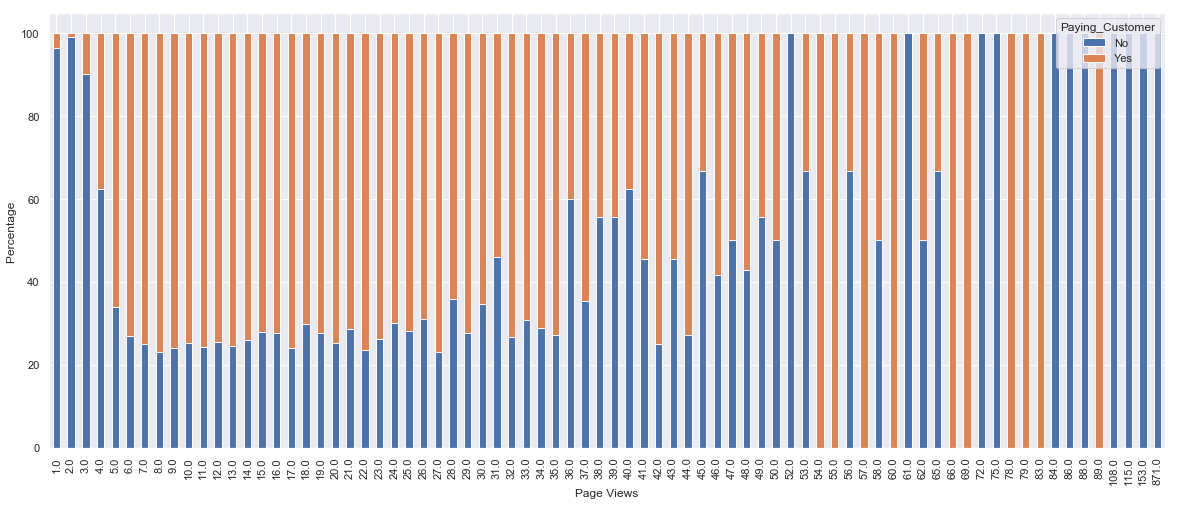

In [10]:
pageviews=pd.crosstab(df['pageviews'],df['Paying_Customer'])
(pageviews.div(pageviews.sum(1).astype(float),axis=0)*100).plot(kind="bar",stacked=True,figsize=(20,8))
plt.xlabel("Page Views")
plt.ylabel("Percentage ")
plt.show()

###### it is evident that more the page views more the chances of being a paid customer

# Task 2

##### What are the most important fields that have the most impact on transaction revenue?

In [11]:
# Checking correlation between  features 
 
columns_to_drop=['fullVisitorId','visitId','date','socialEngagementType','mobileDeviceModel',\
                 
                 'networkDomain','language', 'continent','subContinent','campaignCode','isMobile','date',\
                 'visitStartTime','keyword','region','referralPath'] #'campaign'
dfx=df.drop(columns=columns_to_drop) 

In [12]:
# Converting categorical variables to numericals using sklearn's LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfx.channelGrouping=le.fit_transform(df.channelGrouping)
dfx.adContent=le.fit_transform(df['adContent'].astype(str))
dfx.isTrueDirect=le.fit_transform(df.isTrueDirect)
dfx.Paying_Customer=le.fit_transform(df.Paying_Customer)
dfx.operatingSystem=le.fit_transform(dfx.operatingSystem)
dfx.source=le.fit_transform(dfx.source)
dfx.deviceCategory=le.fit_transform(df.deviceCategory)
dfx.medium=le.fit_transform(df.medium)
dfx.country=le.fit_transform(df.country)
dfx.browser=le.fit_transform(df.browser)
dfx.campaign=le.fit_transform(df['campaign'].astype(str))



In [13]:
# Treating NULL Values 

dfx['bounces'].fillna(0,inplace=True)
dfx['pageviews'].fillna(0,inplace=True)
dfx['timeOnSite'].fillna(0,inplace=True)
dfx['newVisits'].fillna(0,inplace=True)
dfx['transactionRevenue'].fillna(0,inplace=True)
dfx['visits'].fillna(0,inplace=True)

In [14]:
dfx.head()


,visitNumber,channelGrouping,visits,hits,pageviews,timeOnSite,bounces,newVisits,transactions,transactionRevenue,campaign,source,medium,adContent,isTrueDirect,browser,operatingSystem,deviceCategory,country,Paying_Customer
0,1,7,1.0,11,5.0,527.0,0.0,1.0,1.0,25730291.0,0,0,0,2507,1,47,8,0,94,1
1,2,5,1.0,24,10.0,480.0,0.0,0.0,1.0,24255052.0,0,0,0,2507,1,13,19,0,94,1
2,1,0,1.0,13,7.0,1059.0,0.0,1.0,1.0,26567995.0,0,0,0,2507,1,23,19,0,94,1
3,10,7,1.0,5,4.0,855.0,0.0,0.0,1.0,88234015.0,0,1563,17,2507,0,13,19,0,165,1
4,1,11,1.0,18,8.0,445.0,0.0,1.0,1.0,8475571.0,483,2164,3,2527,0,13,19,0,165,1


In [15]:
mean_revenue=dfx['transactionRevenue'].mean()
std_dev_revenue=dfx['transactionRevenue'].std()

mean_time_on_site=dfx['timeOnSite'].mean()
std_dev_time_on_site=dfx['timeOnSite'].std()
 
dfx['transactionRevenue_normalized']=dfx['transactionRevenue'].apply(lambda x: (x-mean_revenue)/std_dev_revenue)
dfx['timeOnSite']=dfx['timeOnSite'].apply(lambda x: (x-mean_time_on_site)/std_dev_time_on_site)
dfx.drop(columns=['transactionRevenue','timeOnSite'],inplace=True)

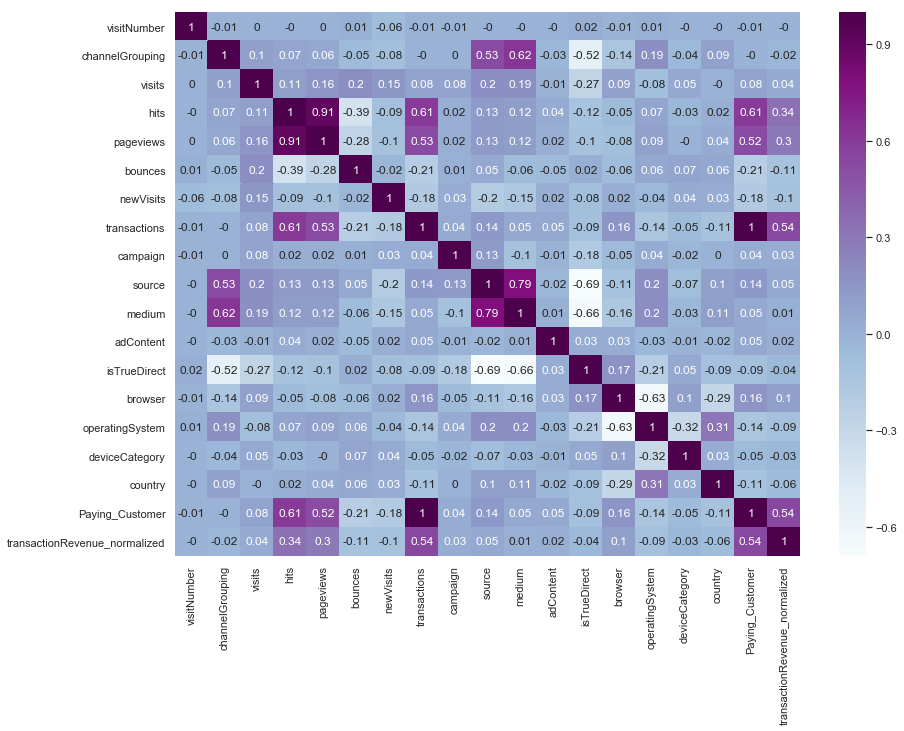

In [16]:
# Creating correlation matrix to check Pearson's correlation between  features 
matrix=round(dfx.corr(method='pearson'),2)
sns.set(rc={'figure.figsize':(14,10)})
sns.heatmap(matrix,  cmap="BuPu",annot=True)
plt.show()

### The most important fields that have the most impact on transaction revenue are : 

#### 1) transactions -Total number of ecommerce transactions within the session.(r=0.54)
#### 2) hits (r=0.34)
#### 3) page views (r=0.30)
#### 4) time on site (r=0.24)  where r is Pearson's Co-efficient

# Task 3
#### Outline two sophisticated analysis that are possible with the given data describe the business questions and the business actions.
 

##### -- It is possible to predict the Paying_Customer with the help of machine learning techniques and modelling.

##### -- Two ML Algorithms(Logistic Regression and Decision Tree ) are applied on feature engineered data for prediction 

##### -- From correlation matrix hits and pageviews are the most important features affecting Paying_Customer

##### -- Features selected for prediction are : hits,country, adContent,operatingSystem 

##### -- From the data, it is possible to identify best marketing campaign using metrics like conversion rate, cost per lead          etc. It will help marketing team take data driven approach on marketing spends. 

In [17]:
from sklearn.model_selection import train_test_split
X=dfx[['hits','country','adContent','operatingSystem']]
y=dfx['Paying_Customer']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0, shuffle=True,stratify=y)

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
predicted_model=logistic_model.predict(X_test)
score_logistic =accuracy_score(predicted_model,y_test)*100
print('Accuracy score for Logistic Regression: {0}'.format(round(score_logistic,2)))

C:\Users\ToM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score for Logistic Regression: 94.09


# Decision tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
predicted_model=tree_model.predict(X_test)
score_tree =accuracy_score(predicted_model,y_test)*100 
print('Accuracy score for Decsion Tree: {0}'.format(round(score_tree,2)))

Accuracy score for Decsion Tree: 96.96
